# Day 11: SciPy for Interpolation and Integration

On Day 10, we explored statistics, optimization, and linear algebra. Today, we'll dive into two more fundamental capabilities of SciPy: interpolation and integration.

- **Interpolation:** Estimating unknown values that fall between known data points.
- **Integration:** Calculating the area under a curve, a common task in physics, engineering, and finance.

Let's begin by importing our standard toolkit of libraries.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate

---

## Part 1: Interpolation with `scipy.interpolate`

Imagine you've run an experiment and collected a few data points, but you need to know the values at points you didn't measure. Interpolation helps you create a function that passes through your known points, allowing you to estimate the in-between values.

Let's create some sparse sample data, as if we measured a few points on a sine wave.

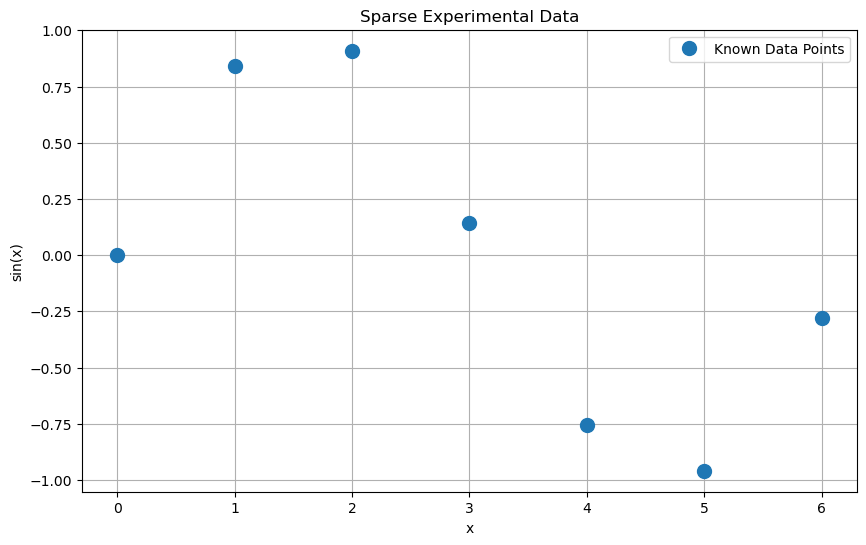

In [ ]:
# Our sparse, known data points
x_known = np.array([0, 1, 2, 3, 4, 5, 6])
y_known = np.sin(x_known)

# Let's visualize our known data
plt.figure(figsize=(10, 6))
plt.plot(x_known, y_known, "o", markersize=10, label="Known Data Points")
plt.title("Sparse Experimental Data")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True)
plt.show()

Now, we want to estimate the values for `sin(x)` at much higher resolution.

**Exercise 1.1:** Use `interpolate.interp1d` to create a **linear** interpolation function from our known data. Then, use this function to calculate the y-values for a new, denser set of x-values. Finally, plot the results.

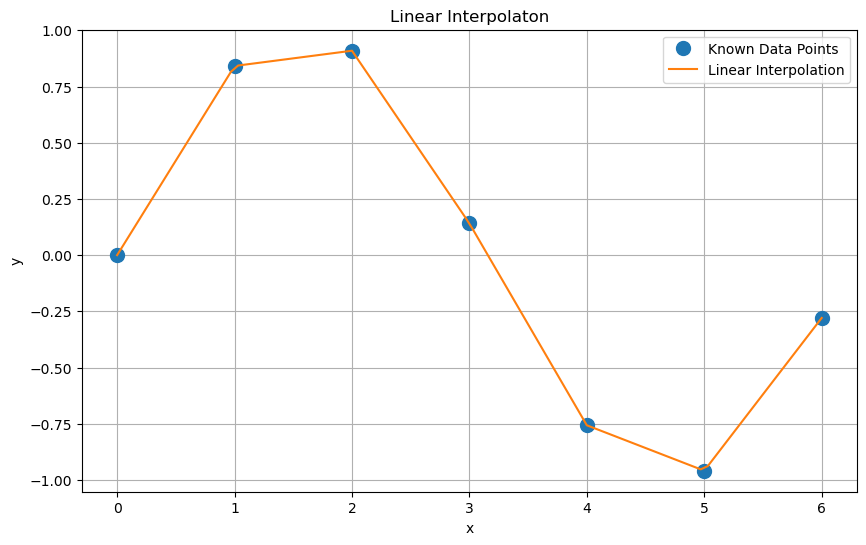

In [ ]:
# Your code here
f_linear = interpolate.interp1d(x_known, y_known, kind="linear")

x_densj = np.linspace(0, 6, 100)

y_linear_interp = f_linear(x_dense)

plt.figure(figsize=(10, 6))
plt.plot(x_known, y_known, "o", markersize=10, label="Known Data Points")
plt.plot(x_dense, y_linear_interp, "-", label="Linear Interpolation")
plt.title("Linear Interpolaton")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

**Solution 1.1:**

In [ ]:
# Create a linear interpolation function
# The 'kind' argument specifies the type of interpolation
f_linear = interpolate.interp1d(x_known, y_known, kind="linear")

# Create a dense set of x-values where we want to estimate y
x_dense = np.linspace(0, 6, 100)

# Use our function to find the interpolated y-values
y_linear_interp = f_linear(x_dense)

# Plot everything together
plt.figure(figsize=(10, 6))
plt.plot(x_known, y_known, "o", markersize=10, label="Known Data Points")
plt.plot(x_dense, y_linear_interp, "-", label="Linear Interpolation")
plt.title("Linear Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

As you can see, linear interpolation simply connects the known points with straight lines. We can often get a smoother, more accurate result using a more advanced method, like a cubic spline.

**Exercise 1.2:** Repeat the process from Exercise 1.1, but this time, create a **cubic** interpolation function by setting `kind='cubic'`. Plot the cubic interpolation, the linear interpolation, and the original points on the same graph to compare them.

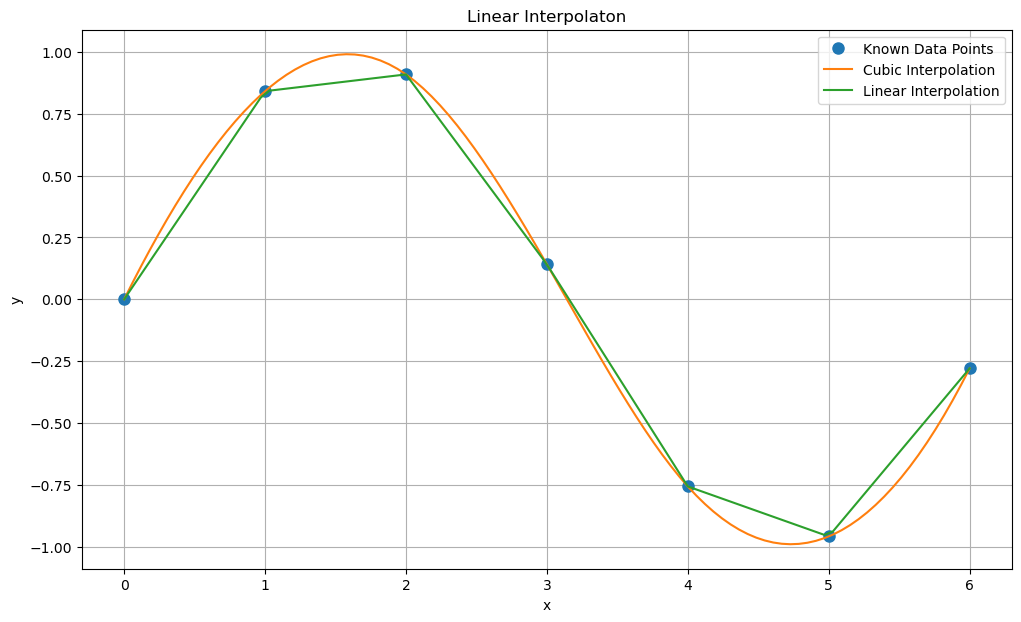

In [ ]:
# Your code here
f_cubic = interpolate.interp1d(x_known, y_known, kind="cubic")

x_denser = np.linspace(0, 6, 100)

y_cubic_interp = f_cubic(x_dense)

plt.figure(figsize=(12, 7))
plt.plot(x_known, y_known, "o", markersize=8, label="Known Data Points")
plt.plot(x_denser, y_cubic_interp, "-", label="Cubic Interpolation")
plt.plot(x_dense, y_linear_interp, "-", label="Linear Interpolation")
plt.title("Linear Interpolaton")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

**Solution 1.2:**

In [ ]:
# Create a cubic interpolation function
f_cubic = interpolate.interp1d(x_known, y_known, kind="cubic")

# Use the function to find the interpolated y-values
y_cubic_interp = f_cubic(x_dense)

# Plot everything for comparison
plt.figure(figsize=(12, 7))
plt.plot(x_known, y_known, "o", markersize=10, label="Known Data Points")
plt.plot(
    x_dense, y_linear_interp, "--", label="Linear Interpolation"
)  # Dashed line for linear
plt.plot(
    x_dense, y_cubic_interp, "-", label="Cubic Interpolation"
)  # Solid line for cubic
plt.plot(
    x_dense, np.sin(x_dense), ":", color="gray", label="True sin(x)"
)  # Dotted line for true function
plt.title("Linear vs. Cubic Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Notice how the cubic interpolation creates a much smoother curve that more closely resembles the true `sin(x)` function.

---

## Part 2: Integration with `scipy.integrate`

Numerical integration is used to find the area under a curve when you can't solve the integral analytically (by hand). The most common tool for this in SciPy is the `quad` function (short for quadrature).

Let's start with a simple function we *can* solve by hand to verify our result: `f(x) = x^2`. The integral is `F(x) = (1/3)x^3`. The area under the curve from `x=0` to `x=2` is `F(2) - F(0) = (1/3)*2^3 - 0 = 8/3 ≈ 2.667`.

In [9]:
def my_parabola(x):
    return x**2

**Exercise 2.1:** Use `integrate.quad()` to calculate the definite integral of `my_parabola` from `0` to `2`. Print the result and the estimated error.

Analytical result: 8/3 = 2.66666667
Numerical result from quad: 2.66666667
Estimated absolute error: 2.96e-14


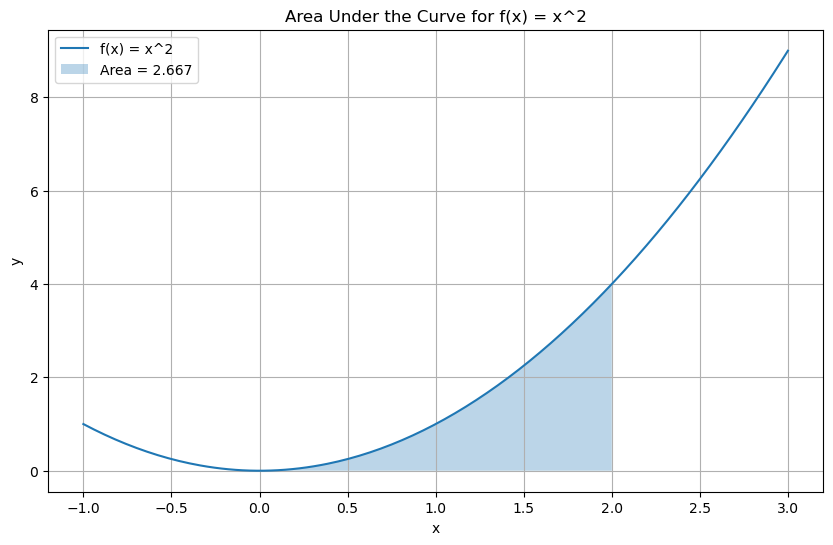

In [10]:
# Your code here
result, error = integrate.quad(my_parabola, 0, 2)
print(f"Analytical result: 8/3 = {8/3:.8f}")
print(f"Numerical result from quad: {result:.8f}")
print(f"Estimated absolute error: {error:.2e}")

x = np.linspace(-1, 3, 200)
y = my_parabola(x)
x_fill = np.linspace(0, 2, 100)
y_fill = my_parabola(x_fill)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = x^2")
plt.fill_between(x_fill, y_fill, alpha=0.3, label=f"Area = {result:.3f}")
plt.title("Area Under the Curve for f(x) = x^2")

plt.xlabel('x')
plt.ylabel("y")
plt.legend()
plt.grid(True)

**Solution 2.1:**

Analytical result: 8/3 = 2.66666667
Numerical result from quad: 2.66666667
Estimated absolute error: 2.96e-14


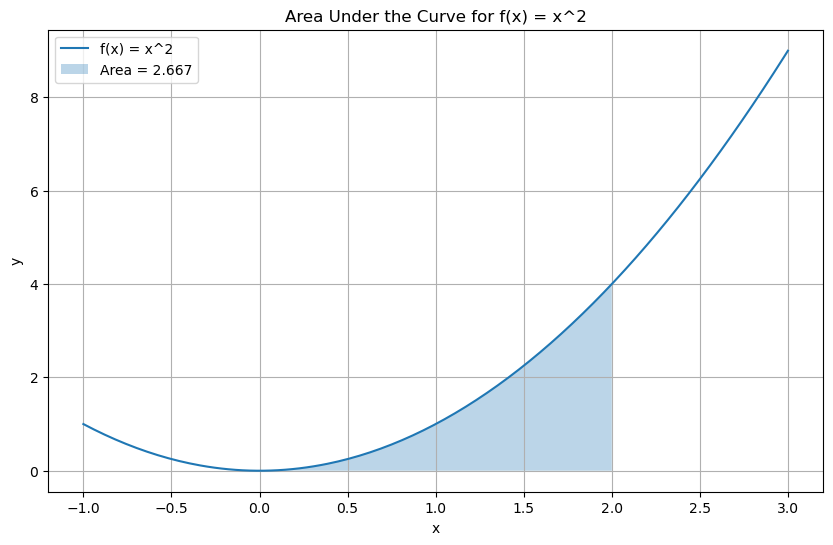

In [14]:
# The quad function takes the function to integrate, and the lower and upper limits
result, error = integrate.quad(my_parabola, 0, 2)

print(f"Analytical result: 8/3 = {8/3:.8f}")
print(f"Numerical result from quad: {result:.8f}")
print(f"Estimated absolute error: {error:.2e}")

# Let's visualize what we just calculated
x = np.linspace(-1, 3, 200)
y = my_parabola(x)
x_fill = np.linspace(0, 2, 100)
y_fill = my_parabola(x_fill)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = x^2")
plt.fill_between(x_fill, y_fill, alpha=0.3, label=f"Area = {result:.3f}")
plt.title("Area Under the Curve for f(x) = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

The power of `quad` becomes clear when we have functions that are difficult or impossible to integrate by hand, like the Gaussian function, `f(x) = e^(-x^2)`, which is fundamental to probability and statistics.

**Exercise 2.2:** Calculate the integral of the Gaussian function `f(x) = e^(-x^2)` from negative infinity to positive infinity. The famous analytical result is the square root of pi (√π). Use `np.inf` to represent infinity.

In [17]:
# Your code here
# First, define the function
def gaussian(x):
    return np.exp(-(x**2))


# Then, use quad to integrate it from -inf to +inf
result, error = integrate.quad(gaussian, -np.inf, np.inf)
print(f"Analytical result: sqrt(pi) = {np.sqrt(np.pi):.8f}")
print(f"Numerical result from quad: {result:.8f}")
print(f"Estimated absolute error: {error:.8f}")

Analytical result: sqrt(pi) = 1.77245385
Numerical result from quad: 1.77245385
Estimated absolute error: 0.00000001


**Solution 2.2:**

In [ ]:
# Solution
def gaussian(x):
    return np.exp(-(x**2))


# Use np.inf for infinity
result, error = integrate.quad(gaussian, -np.inf, np.inf)

print(f"Analytical result: sqrt(pi) = {np.sqrt(np.pi):.8f}")
print(f"Numerical result from quad: {result:.8f}")
print(f"Estimated absolute error: {error:.2e}")

---

### Fantastic Progress!

You've now wielded two more of SciPy's powerful tools. You can fill in the gaps in your data with `interpolate` and find the area under virtually any curve with `integrate`. These skills are essential for processing real-world data and solving complex scientific problems.

Tomorrow, we'll return to `matplotlib` to learn some advanced visualization techniques, such as creating figures with multiple subplots.